In [2]:
#common imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
# print(os.listdir('../input/nslkdd'))

In [4]:
columns=['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
        'attack_type']

In [5]:
attack_category = {'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal'}

In [6]:
# Reading the dataset
path = "../input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
test_path = "../input/kdd-cup-1999-data/corrected.gz"
train_data_uncleaned = pd.read_csv(path,names=columns)
test_data_uncleaned = pd.read_csv(test_path,names=columns)

In [7]:
def clean_data(data,attack_category,isTest):
    
    df = data
    # Since target column has a period at the end we remove it  
    df['attack_type'] = df['attack_type'].apply(lambda x:x[:-1])
    
    # Test data has some extra attacks not provided in training ,remove the extras
    if isTest:
        df = df.loc[df.attack_type.isin(list(attack_category.keys()))]
        
    # add attack_type column
    df['attack_category'] = df['attack_type'].apply(lambda x:attack_category[x])
    
    # Convert categorical data to numeric and type cast them int64
    for col in ['protocol_type','service','flag']:
        df[col] = pd.Categorical(df[col])
        
    df['flag'] = df.flag.cat.codes
    df['protocol_type'] = df.protocol_type.cat.codes
    df['service'] = df.service.cat.codes
    
    df['service'] = df['service'].astype(np.int64)
    df['flag'] = df['flag'].astype(np.int64)
    df['protocol_type'] = df['protocol_type'].astype(np.int64)
    
    # Filter data to remove attack types with less then 20 rows
    if not isTest:
        df = df.groupby('attack_type').filter(lambda x : len(x)>21)
        
    # Delete the corresponsding attack types in test data
    delete_values = ['land','ftp_write','imap','multihop','phf','spy','warezmaster','loadmodule','rootkit','perl']
    if(isTest):
        df = df.loc[~df.attack_type.isin(delete_values)]
    
    return df


In [8]:
data = clean_data(train_data_uncleaned, attack_category, False)
test_data = clean_data(test_data_uncleaned,attack_category,True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [9]:
test_data.shape, data.shape

((290648, 43), (493925, 43))

In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,normal
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,normal
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,normal


In [11]:
#Getting some statistics on the attack_type and the categories number
data.groupby(["attack_category","attack_type" ]).size()

attack_category  attack_type    
dos              back                 2203
                 neptune            107201
                 pod                   264
                 smurf              280790
                 teardrop              979
normal           normal              97278
probe            ipsweep              1247
                 nmap                  231
                 portsweep            1040
                 satan                1589
r2l              guess_passwd           53
                 warezclient          1020
u2r              buffer_overflow        30
dtype: int64

In [12]:
test_data.groupby(["attack_category","attack_type" ]).size()

attack_category  attack_type    
dos              back                 1098
                 neptune             58001
                 pod                    87
                 smurf              164091
                 teardrop               12
normal           normal              60593
probe            ipsweep               306
                 nmap                   84
                 portsweep             354
                 satan                1633
r2l              guess_passwd         4367
u2r              buffer_overflow        22
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers, losses, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers


# 5-class Classification

In [14]:
# Dropping attack type from the data set since that is not needed for this classification
df = data.drop(['attack_type',], axis=1)
print(df.shape)
test_df = test_data.drop(['attack_type',],axis=1)

# Target variable = Attack Category 
y_train = df[['attack_category']].values.ravel()
# Train dataset does not include the target column
x_train = df.drop(['attack_category',], axis=1)

# Test target variable or the true class
y_test = test_df[['attack_category']].values.ravel()
# Test dataset
x_test = test_df.drop(['attack_category',],axis=1)

# Normalising test and train data
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

(493925, 42)


In [15]:
x_train.shape, x_test.shape

((493925, 41), (290648, 41))

In [46]:
def autoencoder(x_train, x_test):
    learning_rate = 1e-3
    input_layer = layers.Input(shape = x_train.shape[1:])
    # flattened = layers.Flatten()(input_layer)
    hidden1 = layers.Dense(14, activation = 'sigmoid',use_bias=True,activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    hidden2 = layers.Dense(28, activation = 'sigmoid',use_bias=True)(hidden1)
    hidden3 = layers.Dense(28, activation = 'sigmoid',use_bias=True, name='hidden3')(hidden2)
    latent = layers.Dense(41, activation = 'sigmoid',use_bias=True)(hidden3)
    encoder1 = Model(inputs = input_layer, outputs = latent, name = 'encoder1')
    
    t0 = time.time()
    encoder1.compile(optimizer='adam', loss=losses.MeanSquaredError())
    history1 = encoder1.fit(x_train, x_train, epochs=20, batch_size=20,validation_data=(x_test,x_test), verbose=1)
    
    temp_model = Model(encoder1.input, encoder1.get_layer('hidden3').output)
    temp_model.save('first_encoder')
    second_input = temp_model.predict(x_train)
    second_test_input = temp_model.predict(x_test)

    
    # Second auto encoder
    encoder2_input = layers.Input(shape = second_input.shape[1:])
    encoder2_hidden1 = layers.Dense(14, activation = 'sigmoid',use_bias=True,activity_regularizer=regularizers.l1(learning_rate))(encoder2_input)
    encoder2_hidden2 = layers.Dense(28, activation = 'sigmoid',use_bias=True)(encoder2_hidden1)
    encoder2_hidden3 = layers.Dense(28, activation = 'sigmoid',use_bias=True, name='hidden3')(encoder2_hidden2)
    output = layers.Dense(28, activation = 'sigmoid',use_bias=True)(encoder2_hidden3)
    
    encoder2 = Model(inputs = encoder2_input , outputs = output, name= 'encoder2')
    encoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())
    history2 = encoder2.fit(second_input, second_input, epochs=20, batch_size=20,validation_data=(second_test_input,second_test_input), verbose=1)
    t1 = time.time()
    temp_model2 = Model(encoder2.input, encoder2.get_layer('hidden3').output)
    temp_model.save('second_encoder')
    features = temp_model2.predict(second_input)
    test_features = temp_model2.predict(second_test_input)
    print(t1-t0)
    return history1, history2, features, test_features

In [47]:
%time
history1, history2, X_train_encode, X_test_encode = autoencoder(x_train, x_test)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 27.9 µs
Epoch 1/20
24697/24697 [==============================] - 46s 2ms/step - loss: 0.0347 - val_loss: 0.0076
Epoch 2/20
24697/24697 [==============================] - 45s 2ms/step - loss: 0.0022 - val_loss: 0.0074
Epoch 3/20
24697/24697 [==============================] - 45s 2ms/step - loss: 0.0017 - val_loss: 0.0081
Epoch 4/20
24697/24697 [==============================] - 46s 2ms/step - loss: 0.0014 - val_loss: 0.0091
Epoch 5/20
24697/24697 [==============================] - 46s 2ms/step - loss: 0.0013 - val_loss: 0.0091
Epoch 6/20
24697/24697 [==============================] - 46s 2ms/step - loss: 0.0012 - val_loss: 0.0085
Epoch 7/20
24697/24697 [==============================] - 45s 2ms/step - loss: 0.0011 - val_loss: 0.0083
Epoch 8/20
24697/24697 [==============================] - 45s 2ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 9/20
24697/24697 [==============================] - 43s 2ms/step - loss: 0.0010 - val_loss

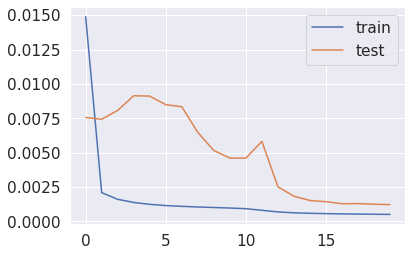

In [48]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

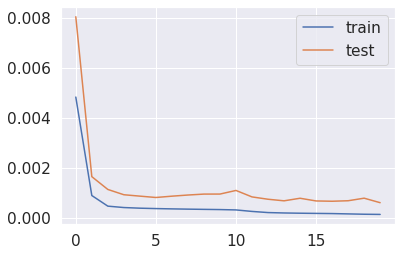

In [49]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [50]:
%%time
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train_encode,y_train)

CPU times: user 4min 58s, sys: 0 ns, total: 4min 58s
Wall time: 4min 58s


RandomForestClassifier(n_estimators=200)

In [51]:
# %time
# # K-fold cross validation
# kf = KFold(n_splits=10, random_state = 42, shuffle = True)
# scores = cross_val_score(clf, X_train_encode, y_train, cv = kf)
# print('Cross-validation accuracy: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))


In [52]:
%time
y_predict = clf.predict(X_test_encode)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [53]:
acc1 = accuracy_score(y_test, y_predict)
print(acc1*100)

97.57404145220335


In [54]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
# precision_recall_fscore_support(y_test,y_predict,zero_division='warn')


In [55]:
report = classification_report(y_test,y_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df['precision'] = report_df.precision.apply(lambda x: x*100)
report_df['recall'] = report_df.recall.apply(lambda x: x*100)
report_df['f1-score'] = report_df['f1-score'].apply(lambda x: x*100)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
report_df

,precision,recall,f1-score,support
dos,99.622104,99.291501,99.456528,223289.00000
normal,91.413886,98.625254,94.882746,60593.00000
probe,78.088839,88.010097,82.753165,2377.00000
r2l,79.166667,0.870163,1.721404,4367.00000
u2r,0.000000,0.000000,0.000000,22.00000
accuracy,97.574041,97.574041,97.574041,0.97574
macro avg,69.658299,57.359403,55.762769,290648.00000
weighted avg,97.419902,97.574041,96.890398,290648.00000


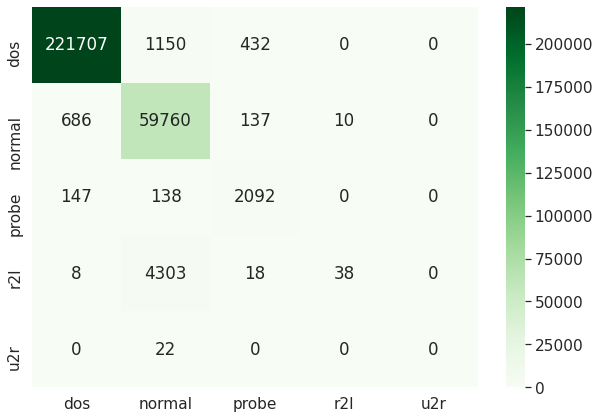

In [57]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,accuracy_score
labels = ['dos','normal','probe','r2l','u2r']
cm = confusion_matrix(y_test, y_predict) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, columns = labels)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g',cmap="Greens",xticklabels=labels, yticklabels=labels)


FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FalseAlarm = (FP/(FP+TN))*100

In [58]:
FP,FN,TP,TN

(array([ 841, 5613,  587,   10,    0]),
 array([1582,  833,  285, 4329,   22]),
 array([221707,  59760,   2092,     38,      0]),
 array([ 66518, 224442, 287684, 286271, 290626]))

In [59]:
FalseAlarm

array([1.24853397, 2.43985134, 0.20362784, 0.00349307, 0.        ])

In [60]:
# dos_count = 0
# dos_fp = 0
# for i in range(len(y_test)):
#     if(y_test[i]=='normal' and y_predict[i]=='dos'):
#         dos_fp += 1
# dos_fp    

In [61]:
accuracy_list = list(cm.diagonal()/cm.sum(axis=1))
accuracy_df = pd.DataFrame(list(zip(labels, accuracy_list)),
               columns =['Attack Type', 'Accuracy'])
accuracy_df['Accuracy'] = accuracy_df.Accuracy.apply(lambda  x : x*100)
accuracy_df

,Attack Type,Accuracy
0,dos,99.291501
1,normal,98.625254
2,probe,88.010097
3,r2l,0.870163
4,u2r,0.000000


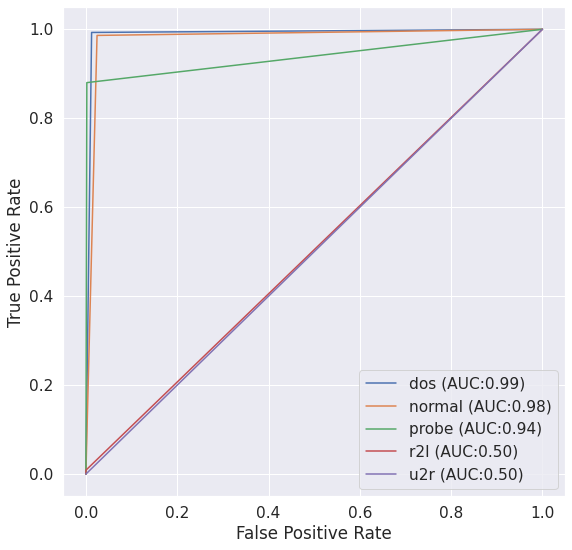

In [62]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_test_one = y_test.reshape(-1, 1)
y_test_onehot = onehot_encoder.fit_transform(y_test_one)
y_predict_onehot = onehot_encoder.transform(y_predict.reshape(-1,1))

all_labels =  ['dos','normal','probe','r2l','u2r']
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(y_test_onehot[:,idx].astype(int), y_predict_onehot[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

## 13 class classification

In [63]:
df1 = data.drop(['attack_category',], axis=1)
print(df.shape)
test_df1 = test_data.drop(['attack_category',],axis=1)

# Target variable and train set
y_train13 = df1[['attack_type']].values.ravel()

# test labels and test set
y_test13 = test_df1[['attack_type']].values.ravel()

(493925, 42)


In [64]:
 test_df1[['attack_type']].value_counts()

attack_type    
smurf              164091
normal              60593
neptune             58001
guess_passwd         4367
satan                1633
back                 1098
portsweep             354
ipsweep               306
pod                    87
nmap                   84
buffer_overflow        22
teardrop               12
dtype: int64

In [65]:
%%time
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train_encode,y_train13)

CPU times: user 5min 27s, sys: 0 ns, total: 5min 27s
Wall time: 5min 27s


RandomForestClassifier(n_estimators=200)

In [66]:
%time
y_predict13 = clf.predict(X_test_encode)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [67]:
acc13 = accuracy_score(y_test13, y_predict13)
print(acc13*100)

97.48080151936362


In [68]:
set(y_predict13)

{'back',
 'guess_passwd',
 'ipsweep',
 'neptune',
 'nmap',
 'normal',
 'pod',
 'portsweep',
 'satan',
 'smurf',
 'teardrop',
 'warezclient'}

In [69]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
precision_recall_fscore_support(y_test13,y_predict13,zero_division='warn')

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.42857143, 0.        , 0.33333333, 0.9153605 , 0.99680866,
        0.671875  , 0.91385321, 0.78125   , 0.4280397 , 0.8340249 ,
        0.99636854, 0.18421053, 0.        ]),
 array([4.09836066e-02, 0.00000000e+00, 2.28990153e-04, 9.54248366e-01,
        9.90879468e-01, 5.11904762e-01, 9.86351559e-01, 8.62068966e-01,
        9.74576271e-01, 7.38518065e-01, 9.99896399e-01, 5.83333333e-01,
        0.00000000e+00]),
 array([7.48129676e-02, 0.00000000e+00, 4.57665904e-04, 9.34400000e-01,
        9.93835220e-01, 5.81081081e-01, 9.48719373e-01, 8.19672131e-01,
        5.94827586e-01, 7.83371224e-01, 9.98129352e-01, 2.80000000e-01,
        0.00000000e+00]),
 array([  1098,     22,   4367,    306,  58001,     84,  60593,     87,
           354,   1633, 164091,     12,      0]))

In [70]:
report13 = classification_report(y_test13,y_predict13, output_dict=True, zero_division='warn')
report_df13 = pd.DataFrame(report13).transpose()
report_df13['precision'] = report_df13.precision.apply(lambda x: x*100)
report_df13['recall'] = report_df13.recall.apply(lambda x: x*100)
report_df13['f1-score'] = report_df13['f1-score'].apply(lambda x: x*100)
report_df13

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

,precision,recall,f1-score,support
back,42.857143,4.098361,7.481297,1098.000000
buffer_overflow,0.000000,0.000000,0.000000,22.000000
guess_passwd,33.333333,0.022899,0.045767,4367.000000
ipsweep,91.536050,95.424837,93.440000,306.000000
neptune,99.680866,99.087947,99.383522,58001.000000
nmap,67.187500,51.190476,58.108108,84.000000
normal,91.385321,98.635156,94.871937,60593.000000
pod,78.125000,86.206897,81.967213,87.000000
portsweep,42.803970,97.457627,59.482759,354.000000
satan,83.402490,73.851806,78.337122,1633.000000


<AxesSubplot:>

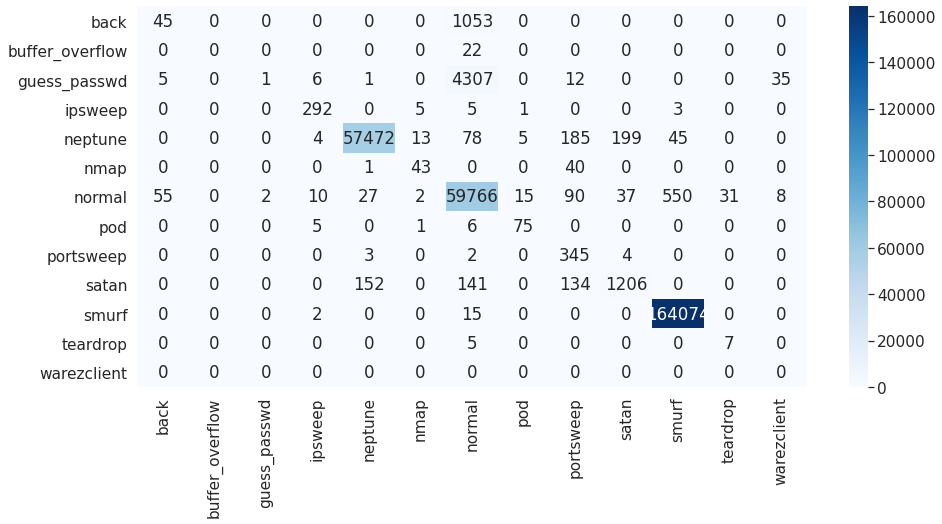

In [71]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,accuracy_score
labels = ['back', 'buffer_overflow', 'guess_passwd', 'ipsweep', 'neptune', 'nmap', 'normal', 'pod', 'portsweep', 'satan', 'smurf', 'teardrop','warezclient']
cm13 = confusion_matrix(y_test13, y_predict13) # rows = truth, cols = prediction
df_cm13 = pd.DataFrame(cm13, columns = labels)
plt.figure(figsize = (15,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm13, annot=True, fmt='g',cmap="Blues",xticklabels=labels, yticklabels=labels)

In [72]:
accuracy_list = list(cm13.diagonal()/cm13.sum(axis=1))
accuracy_df = pd.DataFrame(list(zip(labels, accuracy_list)),
               columns =['Attack Category', 'Accuracy'])
accuracy_df['Accuracy'] = accuracy_df.Accuracy.apply(lambda  x : x*100)
accuracy_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


,Attack Category,Accuracy
0,back,4.098361
1,buffer_overflow,0.000000
2,guess_passwd,0.022899
3,ipsweep,95.424837
4,neptune,99.087947
5,nmap,51.190476
6,normal,98.635156
7,pod,86.206897
8,portsweep,97.457627
9,satan,73.851806


In [73]:
FP13 = cm13.sum(axis=0) - np.diag(cm13)  
FN13 = cm13.sum(axis=1) - np.diag(cm13)
TP13 = np.diag(cm13)
TN13 = cm13.sum() - (FP13 + FN13 + TP13)
FalseAlarm13 = (FP13/(FP13+TN13))*100

In [74]:
FP13,FN13,TP13,TN13

(array([  60,    0,    2,   27,  184,   21, 5634,   21,  461,  240,  598,
          31,   43]),
 array([1053,   22, 4366,   14,  529,   41,  827,   12,    9,  427,   17,
           5,    0]),
 array([    45,      0,      1,    292,  57472,     43,  59766,     75,
           345,   1206, 164074,      7,      0]),
 array([289490, 290626, 286279, 290315, 232463, 290543, 224421, 290540,
        289833, 288775, 125959, 290605, 290605]))

In [75]:
for i in FalseAlarm13:
    print('{:.2f}'.format(i))

0.02
0.00
0.00
0.01
0.08
0.01
2.45
0.01
0.16
0.08
0.47
0.01
0.01
